# NLE Assignment: Sentiment Classification

In this assignment, you will be investigating NLP methods for distinguishing positive and negative reviews written about movies.

For assessment, you are expected to complete and submit this notebook file.  When answers require code, you may import and use library functions (unless explicitly told otherwise).  All of your own code should be included in the notebook rather than imported from elsewhere.  Written answers should also be included in the notebook.  You should insert as many extra cells as you want and change the type between code and markdown as appropriate.

In order to avoid misconduct, you should not talk about the assignment questions with your peers.  If you are not sure what a question is asking you to do or have any other questions, please ask me or one of the Teaching Assistants.

Marking guidelines are provided as a separate document.

The first few cells contain code to set-up the assignment and bring in some data.   In order to provide unique datasets for analysis by different students, you must enter your candidate number in the following cell.  Otherwise do not change the code in these cells.

In [17]:
candidateno=283148 #this MUST be updated to your candidate number so that you get a unique data sample


In [18]:
#do not change the code in this cell
#preliminary imports

#set up nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('movie_reviews')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import movie_reviews

#for setting up training and testing data
import random

#useful other tools
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import zip_longest
from nltk.probability import FreqDist
from nltk.classify.api import ClassifierI


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [19]:
#do not change the code in this cell
def split_data(data, ratio=0.7): # when the second argument is not given, it defaults to 0.7
    """
    Given corpus generator and ratio:
     - partitions the corpus into training data and test data, where the proportion in train is ratio,

    :param data: A corpus generator.
    :param ratio: The proportion of training documents (default 0.7)
    :return: a pair (tuple) of lists where the first element of the
            pair is a list of the training data and the second is a list of the test data.
    """

    data = list(data)
    n = len(data)
    train_indices = random.sample(range(n), int(n * ratio))
    test_indices = list(set(range(n)) - set(train_indices))
    train = [data[i] for i in train_indices]
    test = [data[i] for i in test_indices]
    return (train, test)


def get_train_test_data():

    #get ids of positive and negative movie reviews
    pos_review_ids=movie_reviews.fileids('pos')
    neg_review_ids=movie_reviews.fileids('neg')

    #split positive and negative data into training and testing sets
    pos_train_ids, pos_test_ids = split_data(pos_review_ids)
    neg_train_ids, neg_test_ids = split_data(neg_review_ids)
    #add labels to the data and concatenate
    training = [(movie_reviews.words(f),'pos') for f in pos_train_ids]+[(movie_reviews.words(f),'neg') for f in neg_train_ids]
    testing = [(movie_reviews.words(f),'pos') for f in pos_test_ids]+[(movie_reviews.words(f),'neg') for f in neg_test_ids]

    return training, testing

When you have run the cell below, your unique training and testing samples will be stored in `training_data` and `testing_data`

In [20]:
#do not change the code in this cell
random.seed(candidateno)
training_data,testing_data=get_train_test_data()
print("The amount of training data is {}".format(len(training_data)))
print("The amount of testing data is {}".format(len(testing_data)))
print("The representation of a single data item is below")
print(training_data[0])

The amount of training data is 1400
The amount of testing data is 600
The representation of a single data item is below
(['george', 'little', '(', 'jonathan', 'lipnicki', ')', ...], 'pos')


1)  
a) **Generate** a list of 10 content words which are representative of the positive reviews in your training data.

b) **Generate** a list of 10 content words which are representative of the negative reviews in your training data.

c) **Explain** what you have done and why

[20\%]

In [21]:


# Define a list of english stopwords that shall be removed during normalisation
stop = stopwords.words('english')

# Defining a function to normalise the wordlist to use.
# This normalisation includes converting all words to lowercase, removing all non-alphabetic characters and filtering out any stopwords.
def normalise(wordlist):
  lowered=[word.lower() for word in wordlist]
  filtered=[word for word in lowered if word.isalpha() and word not in stop]
  return filtered


# Normalise every word in training_data
# Create a list of tuples where each contains the normalised frequency distribution of the corresponding words and their labels.
training_norm = [(FreqDist(normalise(wordlist)),label) for (wordlist,label) in training_data]

# Initialize frequency distribution for positive reviews
pos_freq_dist=FreqDist()

# Initialize frequency distribution for negative reviews
neg_freq_dist=FreqDist()


# Iterate through the normalized training data.
# Update both frequency distributions, for positive and negative reviews, by adding the corresponding review to each based on the labels.
for reviewDist,label in training_norm:
    if label=='pos':
        pos_freq_dist+=reviewDist
    else:
        neg_freq_dist+=reviewDist

# Define a function to extract the most frequent words from the positive and negative reviews.
# This function takes into consideration the words that some words are normal for the two kinds of reviews, nullifying those cases.
# Returns a list of the 10 most common words in the kind of review requested.
def most_frequent_words(posfreq,negfreq,topk):
    difference=posfreq-negfreq
    sorteddiff=difference.most_common()
    justwords=[word for (word,freq) in sorteddiff[:topk]]
    return justwords

#Extract lists from the 10 most common words from each positive and negative reviews.
top_pos=most_frequent_words(pos_freq_dist,neg_freq_dist,10)
top_neg=most_frequent_words(neg_freq_dist,pos_freq_dist,10)



In [22]:
top_pos

['film',
 'life',
 'also',
 'great',
 'well',
 'one',
 'best',
 'story',
 'many',
 'films']

In [23]:
top_neg

['movie',
 'bad',
 'plot',
 'even',
 'worst',
 'could',
 'nothing',
 'stupid',
 'script',
 'boring']

In the code for question 1, with the purpose of generating 2 lists, each with 10 representative words from either positive or negative reviews, I followed a process of normalisation, creation of frequency distributions and sorting out irrelevant words; all from the unique training sample I got. The first step, normalisation, has 2 parts: first, defining and filtering out stopwords; and second, filtering out any words in the training data that are not alphabetic. As usually the most common words in english are stopwords, which are not content-bearing, to answer the question it was necessary to filter them out. At the same time, as I was only interested in words, anything that was not an alphabetic character lacked importance, so I filtered them out too. After that, I created a frequency distribution called "training_norm" from the normalised words from the training sample. For the next step, I created two new frequency distribution, for each positive and negative reviews, and populated them with the results of training_norm depending on what label did each word in training_norm had. Creating these frequency distributions was a necessary step in order to get the program to define which were the most common words. Later, I defined a function that would return a list with a given number of the most frequent words from either the positive words list or the negative words list. This function also sorts out any words that are common for both lists of positive and negative review-words to avoid confusion. Finally, all of this was applied and two lists with the ten most common representative words from each positive and bad reviews was returned.

2)
a) **Use** the lists generated in Q1 to build a **word list classifier** which will classify reviews as being positive or negative.

b) **Explain** what you have done.

[12.5\%]


In [24]:

class SimpleClassifier(ClassifierI):

    # Constructor to initialize the SimpleClassifier
    # pos and neg represent positive and negative word distributions
    def __init__(self, pos, neg):
        self._pos = pos
        self._neg = neg

    # Classify a document that is represented as a freqDist
    def classify(self, doc):
        #doc is a FreqDist
        score = 0

        # Calculate a score based on how many representative words from positive and negative reviews appear in the document.
        for word,value in doc.items():
            if word in self._pos:
                score+=value
            if word in self._neg:
                score-=value

        #Based on the score, return a classification of the document being either a negative or positive review.
        return "neg" if score < 0 else "pos"

    # Return the 2 possible labels for classification.
    def labels(self):
        return ("pos", "neg")

#Example usage:

classifier = SimpleClassifier(top_pos, top_neg)
result = classifier.classify(FreqDist("This movie was dreadful".split()))
print(result)

neg


For question two, with the purpose of building a word list classifier that would classify the reviews as being positive or negative I built the class "SimpleClassifier()" that would include three functions. The first function was the constructor to initialize the SimpleClassifier; "pos" and "neg" would represent the given positive and negative distributions respectively. The second function, "classify" would compute a score for the document based on how many of the words from the two given word distributions appear in said document, and classify it between positive or negative depending on the score. The final function would define the possible labels on the document. As an additional, I added an example usage at the end of my code to test my classifier.

3)
a) **Calculate** the accuracy, precision, recall and F1 score of your classifier.

b) Is it reasonable to evaluate the classifier in terms of its accuracy?  **Explain** your answer and give a counter-example (a scenario where it would / would not be reasonable to evaluate the classifier in terms of its accuracy).

[20\%]

In [25]:
def classifier_evaluate(cls, test_data):
    '''
    cls: an instance of a classifier object which has a classify method which returns "pos" or "neg"
    test_data: a list of pairs where each pair is a FreqDist rep of a doc and its label

    returns: float point number which is the accuracy of the classifier on the test data provided
    '''
    acc = 0
    docs,goldstandard=zip(*test_data) #Turns a list of pairs into a pair of lists
    #pass all of the docs to the classifier and get back a list of predictions
    predictions=cls.classify_many(docs)
    #zip the predictions with the goldstandard labels and compare
    for prediction,goldlabel in zip(predictions,goldstandard):
        if prediction==goldlabel:
            acc+=1

    return acc / (len(test_data))

# Get testing data
testing = [(FreqDist(normalise(wordlist)),label) for (wordlist,label) in testing_data]

# Create a SimpleClassifier instance and use the predefined lists from question 1
movie_classifier1 = SimpleClassifier(top_pos,top_neg)

# Calculate and print the accuracy of the classifier on the testing data.
score = classifier_evaluate(movie_classifier1, testing)
print(score)

0.5933333333333334


In [26]:
class ConfusionMatrix:
    def __init__(self,predictions,goldstandard,classes=("pos","neg")):

        (self.c1,self.c2)=classes
        #self.predictions=predictions
        self.TP=0
        self.FP=0
        self.FN=0
        self.TN=0

        # Iterate through predictions and goldstandard labels
        # This will populate the confusion matrix
        for p,g in zip(predictions,goldstandard):
            if g==self.c1:
                if p==self.c1:
                    self.TP+=1
                else:
                    self.FN+=1

            elif p==self.c1:
                self.FP+=1
            else:
                self.TN+=1


    def precision(self):
        p=0
        # Compute precision
        p = self.TP / (self.TP + self.FP)

        return p

    def recall(self):
        r=0
        #Compute recall
        r = self.TP/(self.TP+self.FN)
        return r

    def f1(self):
        f1=0
        #Compute f1 score
        p=self.precision()
        r=self.recall()
        f1=2*p*r/(p+r)
        return f1

# Example usage
docs,labels=zip(*testing)
senti_cm=ConfusionMatrix(movie_classifier1.classify_many(docs),labels)
print(senti_cm.TP)
print(senti_cm.FP)
print(senti_cm.TN)
print(senti_cm.FN)

271
215
85
29


In [27]:
# Print precision, recall, and f1 scores.
print(senti_cm.precision())
print(senti_cm.recall())
print(senti_cm.f1())

0.5576131687242798
0.9033333333333333
0.6895674300254452


It is reasonable to evaluate the classifier in terms of accuracy because between two classes with a balanced distribution, like this case of movie reviews, it provides a reasonable measure of correctness of the classifier. Certainly, the answer I got for the accuracy of my classifier shows that it is not too accurate, but even though scores like the one it got for recall are higher, directly understanding the proportion of true positives and true negatives maintains its importance as a measure that criticizes the classifier is useful for understanding what it lacks for improvement. However, this is only true because the classes I am using are balanced, otherwise, the accuracy metric would be misleading. For example, if the reviews I got for my unique sample were 90% positive and 10% negative, my classifier could directly predict all reviews as positive and still get a 90% accuracy, apparently being better than my current classifier, even though it didn't classify correctly any of the negative reviews. In a case like such, other measures such as F1 score could be far more reasonable.

4)
a)  **Construct** a Naive Bayes classifier (e.g., from NLTK).

b)  **Compare** the performance of your word list classifier with the Naive Bayes classifier.  **Discuss** your results.

[12.5\%]

In [28]:
import math

# Using the training data, normalise the wordlists and create tuples.
training = [(FreqDist(normalise(wordlist)),label) for (wordlist,label) in training_data]

class NBClassifier(ClassifierI):

    def __init__(self):
        self.known = set() #Set to store known vocabulary
        self.priors = {} #Dictionary to store priors
        self.cond_probs = {} #Dictionary to store conditional probabilities

    # Set known vocabulary
    def _set_known_vocabulary(self, training_data):
        known = set()
        for doc, label in training_data:
            for word in list(doc.keys()):
                known.add(word)
        self.known = known

    # Define and set the priors
    def _set_priors(self, training_data):
        priors = {}
        for (doc, label) in training_data:
            priors[label] = priors.get(label, 0) + 1
        total = sum(priors.values())
        for key, value in priors.items():
            priors[key] = value / total
        self.priors = priors

    # Define and set the conditional probabilities
    def _set_cond_probs(self, training_data):
        conds = {}
        for (doc, label) in training_data:
            classcond = conds.get(label, {})
            for word, value in doc.items():
                classcond[word] = classcond.get(word, 0) + value

            conds[label] = classcond

        vocab = self.known
        for label, classcond in conds.items():
            for word in vocab:
                classcond[word] = classcond.get(word, 0) + 1
            total = sum(classcond.values())
            conds[label] = {key: value / total for (key, value) in classcond.items()}

        self.cond_probs = conds

    #Method to train the naive bayes classifier using the known vocabulary, the priors and the conditional probabilities.
    def train(self, training_data):
        self._set_known_vocabulary(training_data)
        self._set_priors(training_data)
        self._set_cond_probs(training_data)

    # Method to classify the documents
    def classify(self, doc):
        doc_probs = {key: math.log(value) for (key, value) in self.priors.items()}

        for word in doc.keys():
            if word in self.known:
                doc_probs = {classlabel: sofar + math.log(self.cond_probs[classlabel].get(word, 0)) for (classlabel, sofar) in doc_probs.items()}

        highprob = max(doc_probs.values())
        classes = [c for c in doc_probs.keys() if doc_probs[c] == highprob]
        return random.choice(classes)

myclassifier=NBClassifier()
myclassifier.train(training)
myclassifier.classify_many(doc for (doc,label) in testing)

['pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'neg',
 'pos',
 'neg',
 'neg',
 'pos',
 'pos',
 'neg',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'neg',
 'pos',
 'pos',
 'neg',
 'pos',
 'neg',
 'neg',
 'pos',
 'pos',
 'pos',
 'neg',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'neg',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'neg',
 'pos',


In [29]:
#Apply the confusion matrix and the methods to calculate accuracy, precision, recall and f1 score of the Naive Bayes classifier.
docs,goldstandard=zip(*testing)
myNB=NBClassifier()
myNB.train(training)
cm=ConfusionMatrix(myNB.classify_many(docs),goldstandard,classes=("pos","neg"))
score2 = classifier_evaluate(myNB, testing)

print('My classifier accuracy is ', score)
print('My classifier precision is ', senti_cm.precision())
print('My classifier recall is ', senti_cm.recall())
print('My classifier f1 score is ', senti_cm.f1())

print('Naive Bayes classifier accuracy is ', score2)
print('Naive Bayes classifier precision is ', cm.precision())
print('Naive Bayes classifier recall is ', cm.recall())
print('Naive Bayes classifier f1 score is ', cm.f1())

My classifier accuracy is  0.5933333333333334
My classifier precision is  0.5576131687242798
My classifier recall is  0.9033333333333333
My classifier f1 score is  0.6895674300254452
Naive Bayes classifier accuracy is  0.8183333333333334
Naive Bayes classifier precision is  0.8350877192982457
Naive Bayes classifier recall is  0.7933333333333333
Naive Bayes classifier f1 score is  0.8136752136752138


The performance of the Naive Bayes classifier proves itself to be clearly superior to the performance of my classifier in all parameters except recall. As it can be seen in the outputs for question 4 and question 3, the accuracy of my classifier stays on approximately 0.59%, whereas the Naive Bayes classifier shows an accuracy of more than 80%, which is a 20% increase in correctly classifying the reviews. Next, the precision of the Naive Bayes classifier also shows an advantage of more than 20% in comparison to My classifier's precision, proving itself to be much better at correct positive predictions. However, my classifier shows a 10% advantage in recall in comparison to the Naive Bayes classifier, demostrating a lower number of false negatives. Lastly, to get the harmonic mean between precision and recall, the f1 score of the Naive Bayes classifier is still superior by approximately 12%, demonstrating that it is better on predictions overall.

5)
a) Design and **carry out an experiment** into the impact of the **length of the wordlists** on the wordlist classifier.  Make sure you **describe** design decisions in your experiment, include a **graph** of your results and **discuss** your conclusions.

b) Would you **recommend** a wordlist classifier or a Naive Bayes classifier for future work in this area?  **Justify** your answer.

[25\%]


In [30]:
sample_sizes=[2,10,50,100,200,400,600,700,1400] #Possible sample sizes, ranging from the minimum possible to all the samples in the training data.
results={}
f1 = {}

number_of_runs = 3 #Number of times the classifier is gonna be tested on each sample size to get a more reliable answer.

#Loop to iterate over all sample sizes
for size in sample_sizes:
    acc1 = 0
    f1Score = 0

    #Loop to iterate for as many runs as asked.
    for i in range(number_of_runs):
        training_NBdata,testing_NBdata=get_train_test_data()
        training = [(FreqDist(normalise(wordlist)),label) for (wordlist,label) in training_NBdata]
        testing = [(FreqDist(normalise(wordlist)),label) for (wordlist,label) in testing_NBdata]

        # Create new wordlists for the classifier, based on the size of the sample.
        positive_training= most_frequent_words(pos_freq_dist,neg_freq_dist,size)
        negative_training= most_frequent_words(neg_freq_dist,pos_freq_dist,size)
        classifier = SimpleClassifier(positive_training, negative_training)

        #Evaluate the accuracy
        accuracy1=classifier_evaluate(classifier,testing)
        acc1 += accuracy1

        # Evaluate the f1 score.
        f1Example = senti_cm.f1()
        f1Score += f1Example

    f1Temp = f1Score/number_of_runs
    f1[size] = f1Temp
    accuracy = acc1/number_of_runs
    results[size] = accuracy

print(results)
print(f1)

{2: 0.6077777777777778, 10: 0.6155555555555555, 50: 0.6105555555555555, 100: 0.6644444444444444, 200: 0.6583333333333333, 400: 0.665, 600: 0.6816666666666666, 700: 0.6788888888888889, 1400: 0.6838888888888889}
{2: 0.6895674300254452, 10: 0.6895674300254452, 50: 0.6895674300254452, 100: 0.6895674300254452, 200: 0.6895674300254452, 400: 0.6895674300254452, 600: 0.6895674300254452, 700: 0.6895674300254452, 1400: 0.6895674300254452}


,0,1
0,2,0.607778
1,10,0.615556
2,50,0.610556
3,100,0.664444
4,200,0.658333
5,400,0.665000
6,600,0.681667
7,700,0.678889
8,1400,0.683889


,0,1
0,2,0.689567
1,10,0.689567
2,50,0.689567
3,100,0.689567
4,200,0.689567
5,400,0.689567
6,600,0.689567
7,700,0.689567
8,1400,0.689567


(0.0, 1.0)

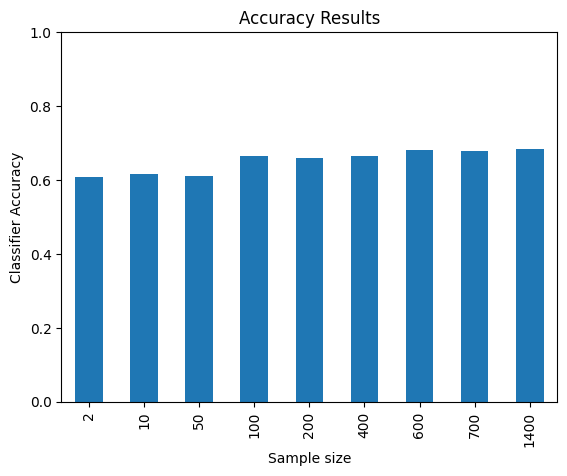

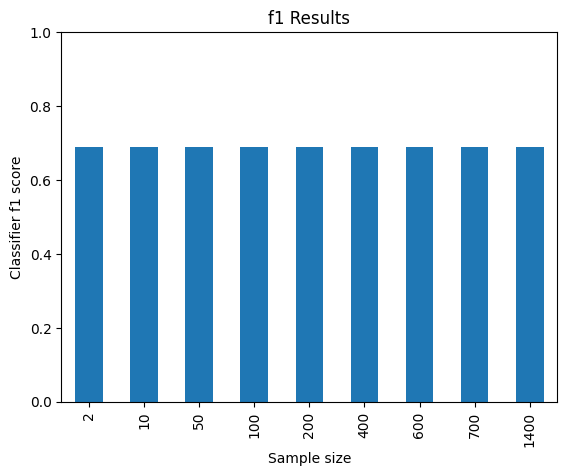

In [31]:
df = pd.DataFrame(list(results.items()))
display(df)
ax = df.plot.bar(title="Accuracy Results",legend=False,x=0)
ax.set_ylabel("Classifier Accuracy")
ax.set_xlabel("Sample size")
ax.set_ylim(0,1.0)

df = pd.DataFrame(list(f1.items()))
display(df)
ax = df.plot.bar(title="f1 Results",legend=False,x=0)
ax.set_ylabel("Classifier f1 score")
ax.set_xlabel("Sample size")
ax.set_ylim(0,1.0)

I decided to carry out an experiment which would test the different accuracy and f1 scores depending on the sample size to use. The sample sizes that I took into account started on 2, as it is the minimum possible value for getting the two different kind of reviews (positive or negative) and went up to 1400 as it is the total number of reviews in the training data. After deciding the sample sizes, I created an algorithm that would test the classifier on each of those samples, three times for each (determined as the number of runs), and get the accuracy and f1 score for each sample, as an average between the three runs. I decided to test the accuracy because I believe it is an important measure to understand the performance of my classifier for how many documents were accurately classified. I also tested the f1 score in order to understand both the recall and the precision of my classifier under a single score. This would help me not to get distracted by the high recall of my algorithm and instead get a more balanced measure. Finally, I chose to plot my results on a bar graph to be able to easily observe the difference in accuracy and f1 score depending on the sample size. This, accompanied by tables for each score, would help to precisely understand the differences.

For the accuracy results, except for a few outliers, there seems to be a consistent increase in the score the bigger the size of the sample is; going from approximately 59% accuracy for 2 samples, all the way to approximately 68% accuracy when using the final 1400 samples. This would prove that there is a direct correlation between the size of the sample and the accuracy of my classifier.
For the F1 results, there is also a difference depending on the size of the sample, as the score increases with said size, showing a direct correlation. However, this increase is considerably small, making it not worth it to use memory of my program on big sample sizes.
As a last observation, it can be seen that the bigger the sample, the behavior of the accuracy score is not to linearly increase; instead, the bigger the sample, the slower the increase in the accuracy, getting each time closer to the F1 score but without reaching it.
This would show that, in general, even though the accuracy score is relevant, the F1 score could be better for evaluating a classifier as it does not depend as much in the size of the sample.

I would recommend the use of a Naive Bayes classifier rather than a word list classifier for future work in this area. From a theoretical point of view, a Naive Bayes classifier can offer a more reliable understanding of sentiment in an area with such diverse language and contexts as movie reviews, because of its probabilistic approach (in comparison to one based off a simple score, as the word list classifier uses). From a practical point of view, during the comparison between my classifier and the Naive Bayes classifier that I performed in question 4, in three out of 4 scores the Naive Bayes classifier showed a superiority between 10% and 20%, demostrating a higher reliability when determining if a movie review is positive or negative.

In [32]:
##This code will word count all of the markdown cells in the notebook saved at filepath

import io
from nbformat import current

from google.colab import drive
drive.mount('/content/drive')

filepath="/content/drive/MyDrive/Colab Notebooks/NLEassignment2023.ipynb"
question_count=432

with io.open(filepath, 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')

word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print("Submission length is {}".format(word_count-question_count))

Mounted at /content/drive
Submission length is 1286
